<a href="https://colab.research.google.com/github/zcm20-cyber/My-Projects/blob/main/1985_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
X = df.copy()
y = X.pop("price")

# Replace '?' with NaN and convert to numeric
X['normalized-losses'] = X['normalized-losses'].replace('?', pd.NA)
X['normalized-losses'] = pd.to_numeric(X['normalized-losses'])

# Replace '?' with NaN in the target variable y and convert to numeric
y = y.replace('?', pd.NA)
y = pd.to_numeric(y)

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
  X[colname], _ = X[colname].factorize()

# ALL discrete features should now have integer dtypes
discrete_features = X.dtypes == int

# Drop rows with missing values in X and y
X.dropna(inplace=True)
y = y[X.index] # Ensure y has the same index as X after dropping rows

In [100]:
import pandas as pd

df = pd.read_csv('/Automobile_data.csv')

In [101]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="Mi Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] # show a few features with their MI scores

,Mi Scores
curb-weight,1.584575
engine-size,0.865817
length,0.634721
wheel-base,0.559152
peak-rpm,0.360995
num-of-cylinders,0.267105
compression-ratio,0.146430
fuel-type,0.053800
num-of-doors,0.000000


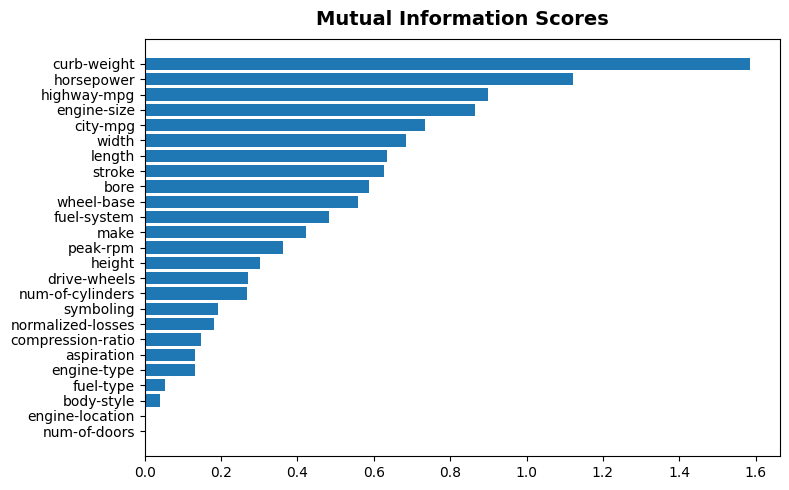

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


# plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    # Ensure y is numeric, but do not drop rows here as it should be done beforehand
    y = y.replace('?', pd.NA)
    y = pd.to_numeric(y)

    # Assume X and y are already aligned and have the same number of rows
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("/Automobile_data.csv")

In [104]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]
X = df.copy()
y = X.pop("price")
X = X.loc[:, features]

# Replace '?' with NaN and convert to numeric in the selected features
for col in features:
    X[col] = X[col].replace('?', pd.NA)
    X[col] = pd.to_numeric(X[col])

# Drop rows with missing values in X
X.dropna(inplace=True)
y = y[X.index] # Ensure y has the same index as X after dropping rows

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [105]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.378386,-0.368379,0.088919,0.203363
1,0.378386,-0.368379,0.088919,0.203363
2,1.522862,-0.067702,0.562780,-0.144605
3,-0.403857,-0.390223,0.231087,0.057841
4,1.121720,-0.787452,-0.231106,0.223398


In [106]:
loadings = pd.DataFrame(
    pca.components_.T, # transposes the matrix of loadings
    columns=component_names, # so the columns are the principal components
    index=X.columns, # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.486367,0.774752,0.088723,-0.394126
engine-size,0.502053,0.624857,-0.062935,0.594589
horsepower,0.500273,0.033803,0.779511,-0.375430
curb-weight,0.510997,0.090396,-0.616871,-0.591761


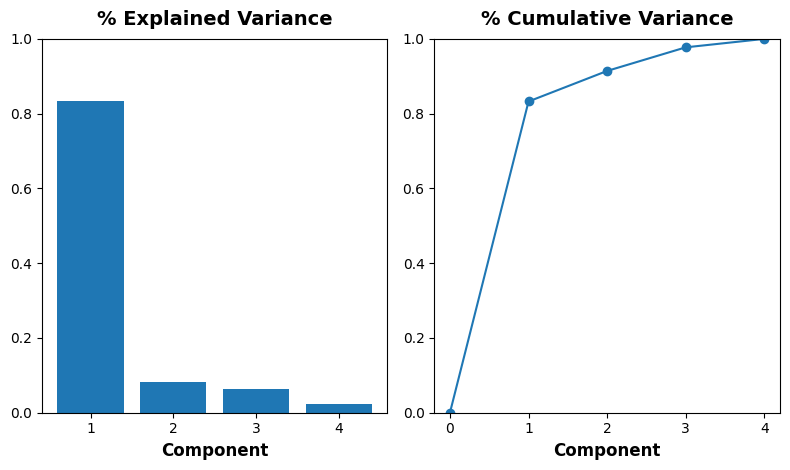

In [107]:
# Look at explained variance
plot_variance(pca);

In [110]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body-style", "horsepower", "curb-weight"]
df.loc[idx, cols]

,make,body-style,horsepower,curb-weight
129,porsche,hatchback,288,3366
126,porsche,hardtop,207,2756
127,porsche,hardtop,207,2756
128,porsche,convertible,207,2800
105,nissan,hatchback,200,3139
...,...,...,...,...
68,mercedes-benz,wagon,123,3750
70,mercedes-benz,sedan,123,3770
110,peugot,wagon,95,3430
114,peugot,wagon,95,3485
